In [3]:
!pip install langchain langchain_groq langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 68.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.7/412.7 kB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.4 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.32
    Uninstalling langchain-core-0.3.32:
      Successfully uninstalled langchain-core-0.3.32


In [75]:
from langchain_groq import ChatGroq
llm=ChatGroq(
    temperature=0,
    groq_api_key="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",
    model_name="llama-3.3-70b-versatile"
)

In [82]:
class State(TypedDict):
    email: str
    cleaned_email: str
    sentiment: str
    reply: str
class EmailProcessor:
  def preprocess_agent(state: State) -> State:
    cleaned_email = state["email"].lower().replace("!", "").replace(".", "").strip()
    state["cleaned_email"] = cleaned_email
    return state
  @staticmethod
  def sentiment_analysis(state):
    prompt = [{"role": "user", "content": f"Classify the sentiment of this email as 'positive', 'negative', or 'neutral' only. Email: {state['cleaned_email']}"}]
    response = llm.invoke(prompt)
    sentiment = response.content.strip().lower()  # Clean output
    state['sentiment'] = sentiment
    print(f"Sentiment: {sentiment}")
    return state
  @staticmethod
  def response(state):
    sentiment = state.get('sentiment', 'neutral')
    if sentiment=="positive":
      reply="Thank you so much"
    elif sentiment=="negative":
      reply="Sorry to hear that"
    else:
      reply="We will get back to you soon"

    state['reply']=reply
    print(f"Reply: {reply}")

    return state





In [6]:
!pip install --upgrade langgraph


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.7/148.7 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 kB 4.0 MB/s eta 0:00:00


In [83]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Annotated
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

class InputState(TypedDict):
    email: str

class IntermediateState(TypedDict):
    results: dict


graph= StateGraph(State)
graph.add_node("preprocess_agent",EmailProcessor.preprocess_agent )
graph.add_node("Sentiment_analysis",EmailProcessor.sentiment_analysis )
graph.add_node("response_agent", EmailProcessor.response )


In [84]:
graph.add_edge(START,'preprocess_agent')
graph.add_edge('preprocess_agent','Sentiment_analysis')
graph.add_edge('Sentiment_analysis','response_agent')
graph.add_edge('response_agent',END)

In [85]:

result = graph.compile()
print(result)

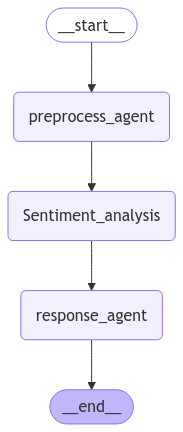

In [80]:
result

In [86]:
def email_classifier(user_email: str):
    print(f"\nProcessing Email: {user_email}\n")

    # Initial state with the user's email
    state = {
        "email": user_email,

    }

    # Run the processing pipeline
    final_state = result.invoke(state)

    # Print final results
    print("\nFinal Classification Results:")
    print(final_state)
    return final_state

# Example Usage
if __name__ == "__main__":
    while True:
        user_input = input("\nUser Email (or type 'exit' to quit): ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break

        # Classify email
        classification = email_classifier(user_input)



User Email (or type 'exit' to quit): i am overjoyed by your result

Processing Email: i am overjoyed by your result

Sentiment: positive
Reply: Thank you so much

Final Classification Results:
{'email': 'i am overjoyed by your result', 'cleaned_email': 'i am overjoyed by your result', 'sentiment': 'positive', 'reply': 'Thank you so much'}

User Email (or type 'exit' to quit): it is very disheartening for your loss

Processing Email: it is very disheartening for your loss

Sentiment: negative
Reply: Sorry to hear that

Final Classification Results:
{'email': 'it is very disheartening for your loss', 'cleaned_email': 'it is very disheartening for your loss', 'sentiment': 'negative', 'reply': 'Sorry to hear that'}

User Email (or type 'exit' to quit): quit
Goodbye!
